to assess the game effectiveness, you can calculate one-day retention for both A-B groups and compare them to identify any significant differences. You can also determine the probability of such differences occurring.

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
df = pd.read_csv("candy_crush.csv")

In [ ]:
df.head(10)

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
5,540,50,187,True,True
6,1066,30,0,False,False
7,1444,50,2,False,False
8,1574,50,108,True,True
9,1587,50,153,True,False


In [ ]:
df.describe()

,user_id,gate,gamerounds_sum
count,9.018900e+04,90189.000000,90189.000000
mean,4.998412e+06,40.087483,51.872457
std,2.883286e+06,9.999673,195.050858
min,1.160000e+02,30.000000,0.000000
25%,2.512230e+06,30.000000,5.000000
50%,4.995815e+06,50.000000,16.000000
75%,7.496452e+06,50.000000,51.000000
max,9.999861e+06,50.000000,49854.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         90189 non-null  int64
 1   gate            90189 non-null  int64
 2   gamerounds_sum  90189 non-null  int64
 3   retention_day   90189 non-null  bool 
 4   retention_week  90189 non-null  bool 
dtypes: bool(2), int64(3)
memory usage: 2.2 MB


In [ ]:
print(df['user_id'].dtype)
print(df['gate'].dtype)
print(df['gamerounds_sum'].dtype)
print(df['retention_day'].dtype)
print(df['retention_week'].dtype)

int64
int64
int64
bool
bool


**change gate to bool??**

In [ ]:
df['gate'].value_counts()

50    45489
30    44700
Name: gate, dtype: int64

## **Mine- EDA**

Number of values for each gate


In [ ]:
gate_30= df[df['gate'] == 30]['user_id'].nunique()
print(gate_30)    

44700


In [ ]:
gate_50= df[df['gate'] == 50]['user_id'].nunique()
print(gate_50)    

45489


**Retention day and gate**

In [ ]:
rd = df.groupby(['gate', 'retention_day'])['user_id'].count()
rd_df = pd.DataFrame(rd.unstack(level= 1))
rd_df.head()

retention_day,False,True
gate,,
30,24666,20034
50,25370,20119


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Retention day split by true/false')

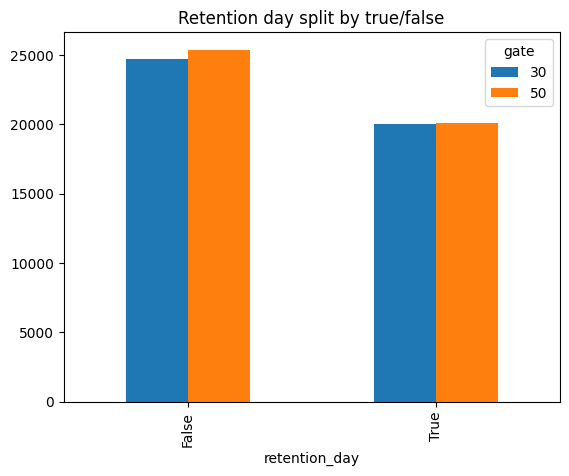

In [ ]:
rd = df.groupby(['retention_day', 'gate'])['user_id'].count()
rd_df = pd.DataFrame(rd.unstack(level= 1))
rd_df.plot(kind='bar')
plt.title('Retention day split by true/false')

Text(0.5, 1.0, 'Retention day split by true/false')

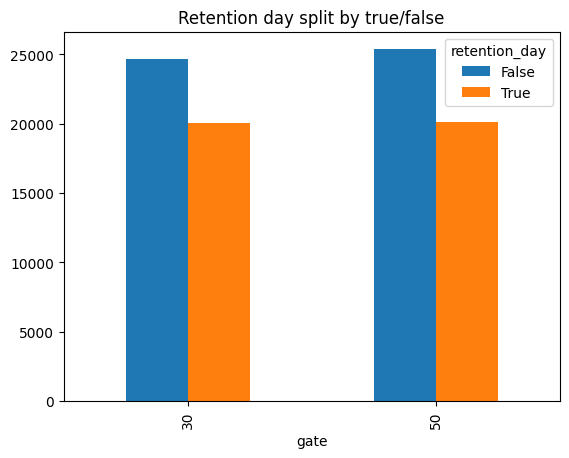

In [ ]:
rd = df.groupby(['gate', 'retention_day'])['user_id'].count()
rd_df = pd.DataFrame(rd.unstack(level= 1))
rd_df.plot(kind='bar')
plt.title('Retention day split by true/false')

**Retention week and gate**

In [ ]:
rw = df.groupby(['gate', 'retention_week'])['user_id'].count()
rw_df = pd.DataFrame(rw.unstack(level= 1))
rw_df.head()

retention_week,False,True
gate,,
30,36198,8502
50,37210,8279


Text(0.5, 1.0, 'Retention week split by gate')

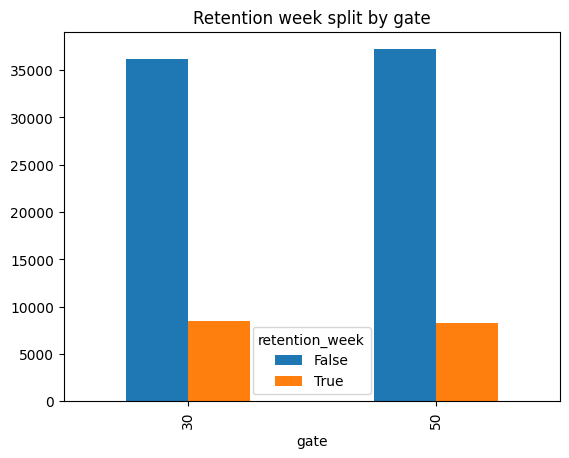

In [ ]:
rw = df.groupby(['gate', 'retention_week'])['user_id'].count()
rw_df = pd.DataFrame(rw.unstack(level= 1))
rw_df.plot(kind='bar')
plt.title('Retention week split by gate')

Text(0.5, 1.0, 'Retention week split by true/false')

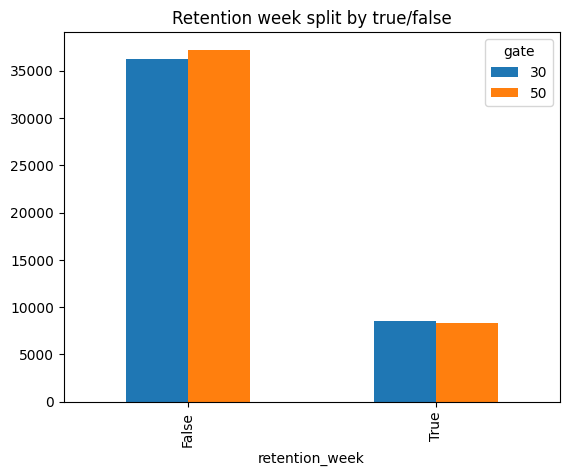

In [ ]:
rw = df.groupby(['retention_week','gate'])['user_id'].count()
rw_df = pd.DataFrame(rw.unstack(level= 1))
rw_df.plot(kind='bar')
plt.title('Retention week split by true/false')

In [ ]:
len(df)

90189

**retention week and retention day for gates**

Text(0.5, 1.0, 'Retention week split by true/false')

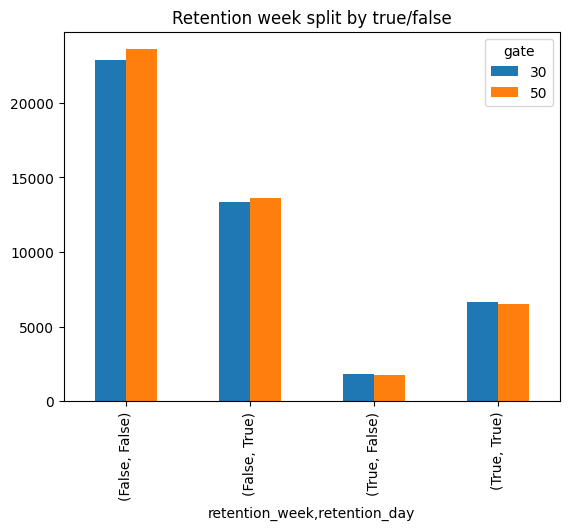

In [ ]:
rw = df.groupby(['retention_week','gate','retention_day'])['user_id'].count()
rw_df = pd.DataFrame(rw.unstack(level= 1))
rw_df.plot(kind='bar')
plt.title('Retention week split by true/false')

In [ ]:
rw = df.groupby(['gate','retention_week','retention_day'])['user_id'].count()
print(rw)

gate  retention_week  retention_day
30    False           False            22840
                      True             13358
      True            False             1826
                      True              6676
50    False           False            23597
                      True             13613
      True            False             1773
                      True              6506
Name: user_id, dtype: int64


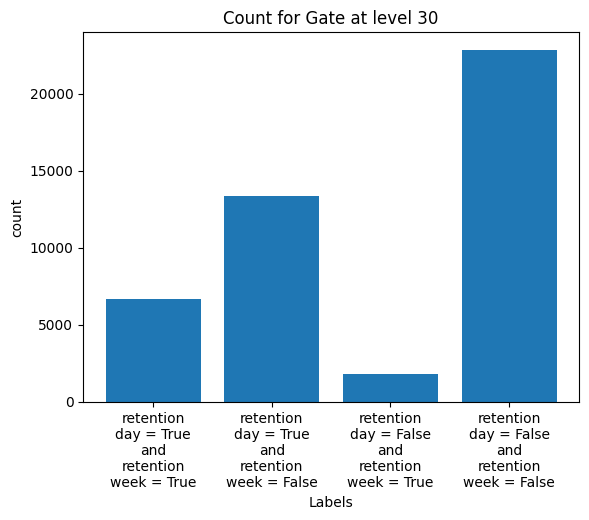

In [ ]:
#Gate 30
import matplotlib.pyplot as plt
from textwrap import wrap
   
labels= ['retention day = True and retention week = True ', 'retention day = True and retention week = False ', 'retention day = False and retention week = True ', 'retention day = False and retention week = False']
count = [6676, 13358, 1826, 22840]
labels = [ '\n'.join(wrap(l, 12)) for l in labels ]

plt.bar(labels, count)
plt.title('Count for Gate at level 30')
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

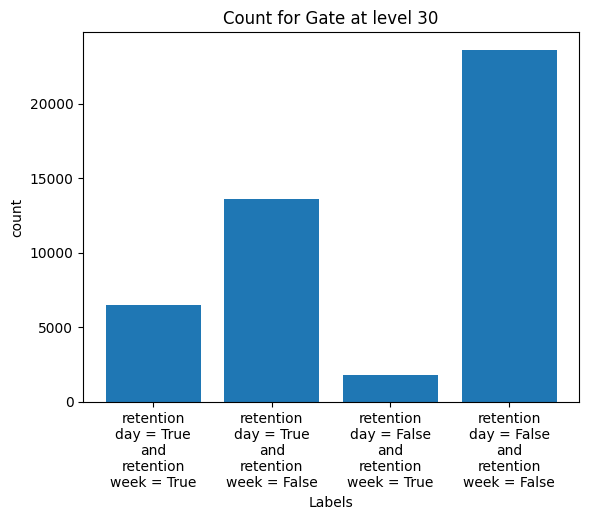

In [ ]:
#Gate 50
import matplotlib.pyplot as plt
from textwrap import wrap
   
labels= ['retention day = True and retention week = True ', 'retention day = True and retention week = False ', 'retention day = False and retention week = True ', 'retention day = False and retention week = False']
count = [6506, 13613, 1773, 23597]
labels = [ '\n'.join(wrap(l, 12)) for l in labels ]

plt.bar(labels, count)
plt.title('Count for Gate at level 30')
plt.xlabel('Labels')
plt.ylabel('count')
plt.show()

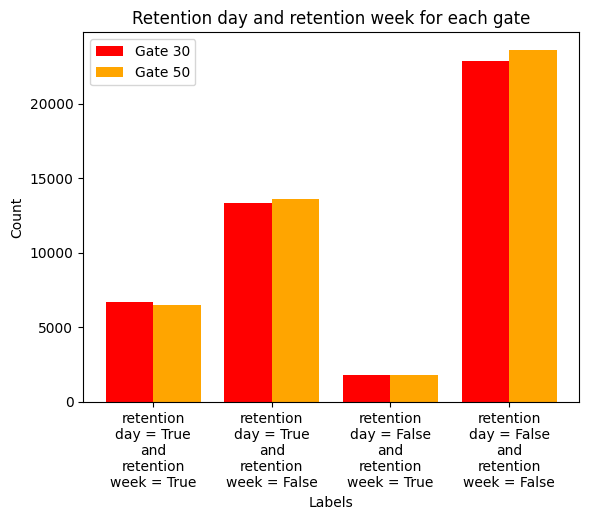

In [ ]:
#Gate 50
import matplotlib.pyplot as plt
from textwrap import wrap

   
labels= ['retention day = True and retention week = True ', 'retention day = True and retention week = False ', 'retention day = False and retention week = True ', 'retention day = False and retention week = False']
count_30 = [6676, 13358, 1826, 22840]
count_50= [6506, 13613, 1773, 23597]

labels = [ '\n'.join(wrap(l, 12)) for l in labels ]

X_axis = np.arange(len(labels))
  
plt.bar(X_axis - 0.2, count_30, 0.4, label = 'Gate 30', color = 'red')
plt.bar(X_axis + 0.2, count_50, 0.4, label = 'Gate 50', color = 'orange')


    
plt.xticks(X_axis, labels)
plt.title('Retention day and retention week for each gate')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
#Gamerounds sum

In [ ]:
thirty_total = 0
fifty_total =0
l = len(df)

for i in range(len(df)):
  if df['gate'][i] == 30:
    thirty_total = thirty_total + df['gamerounds_sum'][i]
    
  elif df['gate'][i] == 50:
    fifty_total = fifty_total + df['gamerounds_sum'][i]
    

print('Total Thirty: ', thirty_total)
print('Total Fifty: ' ,fifty_total)
print('Length: ', l)
print(' ')
print('Averages : Fifty average: ', (fifty_total/ 45489), 'Thirty Average: ', (thirty_total/44700))


Total Thirty:  2344795
Total Fifty:  2333530
Length:  90189
 
Averages : Fifty average:  51.29877552814966 Thirty Average:  52.45626398210291


In [ ]:
import matplotlib.pyplot as plt
import statistics

y_30 = []
y_50 = []

for i in range(len(df)):
  if df['gate'][i] == 30:
    y_30.append(df['gamerounds_sum'][i])
  elif df['gate'][i] == 50:
    y_50.append(df['gamerounds_sum'][i])

print(max(y_30))
print(max(y_50))

print(statistics.mean(y_30))
print(statistics.mean(y_50))

print(statistics.quantiles(y_30))
print(statistics.quantiles(y_50))

49854
2640
52
51
[5.0, 17.0, 50.0]
[5.0, 16.0, 52.0]


In [ ]:
#retention_day and gamerounds sum

In [ ]:
#gate 30

In [ ]:
#for gate 30 , retention day = false
f= []
for i in range(len(df)):
  if df['gate'][i] ==30:
    if df['retention_day'][i] == False:
      f.append(df['gamerounds_sum'][i])
#print(f)

In [ ]:
print(max(f))
print(statistics.mean(f))
print(statistics.mode(f))
print(statistics.quantiles(f))

49854
18
1
[2.0, 6.0, 16.0]


In [ ]:
#for gate 30 , retention day = true
t= []
for i in range(len(df)):
  if df['gate'][i] ==30:
    if df['retention_day'][i] == True:
      t.append(df['gamerounds_sum'][i])
#print(f)

print(max(t))
print(statistics.mean(t))
print(statistics.mode(t))
print(statistics.quantiles(t))

2961
94
15
[22.0, 48.0, 111.0]


In [ ]:
#gate 50

In [ ]:
#for gate 50 , retention day = false
f= []
for i in range(len(df)):
  if df['gate'][i] ==50:
    if df['retention_day'][i] == False:
      f.append(df['gamerounds_sum'][i])
#print(f)
print(max(f))
print(statistics.mean(f))
print(statistics.mode(f))
print(statistics.quantiles(f))

1241
16
1
[2.0, 6.0, 16.0]


In [ ]:
#for gate 50 , retention day = true
t= []
for i in range(len(df)):
  if df['gate'][i] ==50:
    if df['retention_day'][i] == True:
      t.append(df['gamerounds_sum'][i])
#print(f)

print(max(t))
print(statistics.mean(t))
print(statistics.mode(t))
print(statistics.quantiles(t))

2640
95
11
[21.0, 49.0, 112.0]


In [ ]:
#retention_week and gamerounds_sum

In [ ]:
#for gate 30 , retention week = false
f= []
for i in range(len(df)):
  if df['gate'][i] ==30:
    if df['retention_week'][i] == False:
      f.append(df['gamerounds_sum'][i])
#print(f)

print(max(f))
print(statistics.mean(f))
print(statistics.mode(f))
print(statistics.quantiles(f))

981
25
1
[4.0, 11.0, 31.0]


In [ ]:
#for gate 30 , retention week = true
t= []
for i in range(len(df)):
  if df['gate'][i] ==30:
    if df['retention_week'][i] == True:
      t.append(df['gamerounds_sum'][i])
#print(f)

print(max(t))
print(statistics.mean(t))
print(statistics.mode(t))
print(statistics.quantiles(t))

49854
165
44
[48.0, 105.0, 208.0]


In [ ]:
#for gate 50 , retention week = false
f= []
for i in range(len(df)):
  if df['gate'][i] ==50:
    if df['retention_week'][i] == False:
      f.append(df['gamerounds_sum'][i])
#print(f)
print(max(f))
print(statistics.mean(f))
print(statistics.mode(f))
print(statistics.quantiles(f))

2640
25
1
[4.0, 11.0, 30.0]


In [ ]:
#for gate 50 , retention week = true
t= []
for i in range(len(df)):
  if df['gate'][i] ==50:
    if df['retention_week'][i] == True:
      t.append(df['gamerounds_sum'][i])
#print(f)

print(max(t))
print(statistics.mean(t))
print(statistics.mode(t))
print(statistics.quantiles(t))

2294
165
19
[52.0, 111.0, 211.0]


All columns together

In [ ]:
#retention day and retention week for gate 30
tt_30=[]
tf_30=[]
ft_30=[]
ff_30=[]
l = len(df)

for i in range(len(df)):
  if df['gate'][i] == 30 and ( df['retention_day'][i]== True) and df['retention_week'][i]== True:
    tt_30.append(df['gamerounds_sum'][i])
  elif df['gate'][i] == 30 and df['retention_day'][i]== True and df['retention_week'][i]== False:
    tf_30.append(df['gamerounds_sum'][i])
  elif df['gate'][i] == 30 and df['retention_day'][i]== False and df['retention_week'][i]== True:
    ft_30.append(df['gamerounds_sum'][i])
  elif df['gate'][i] == 30 and df['retention_day'][i]== False and df['retention_week'][i]== False:
    ff_30.append(df['gamerounds_sum'][i])


print(tt_30)
print(tf_30)
print(ft_30)
print(ff_30) 

[305, 204, 108, 386, 105, 94, 139, 246, 66, 122, 42, 51, 46, 104, 38, 274, 134, 152, 100, 147, 61, 51, 260, 8, 48, 270, 467, 33, 222, 303, 177, 39, 216, 55, 552, 12, 136, 452, 163, 220, 216, 290, 34, 117, 15, 338, 170, 174, 202, 38, 237, 33, 179, 202, 902, 9, 1906, 118, 259, 298, 24, 106, 128, 61, 197, 79, 282, 49, 95, 70, 332, 798, 81, 142, 186, 164, 249, 50, 546, 394, 375, 29, 519, 553, 86, 81, 281, 142, 191, 1374, 199, 197, 93, 91, 344, 222, 200, 159, 331, 432, 149, 181, 75, 59, 231, 311, 70, 186, 347, 222, 212, 762, 24, 384, 253, 35, 409, 32, 62, 379, 470, 105, 73, 33, 65, 210, 402, 174, 388, 255, 320, 46, 143, 155, 41, 89, 89, 53, 217, 299, 284, 40, 34, 750, 169, 131, 226, 6, 99, 58, 314, 228, 196, 324, 194, 181, 589, 570, 229, 195, 196, 126, 238, 21, 1309, 23, 281, 26, 297, 277, 46, 123, 312, 80, 192, 311, 128, 279, 38, 177, 166, 355, 56, 135, 160, 1252, 104, 42, 23, 46, 385, 57, 131, 222, 246, 176, 47, 45, 62, 69, 35, 414, 227, 70, 93, 219, 54, 287, 76, 28, 249, 173, 667, 311, 1

In [ ]:
#retention day and retention week for gate 50
tt_50=[]
tf_50=[]
ft_50=[]
ff_50=[]
l = len(df)

for i in range(len(df)):
  if df['gate'][i] == 50 and ( df['retention_day'][i]== True) and df['retention_week'][i]== True:
    tt_50.append(df['gamerounds_sum'][i])
  elif df['gate'][i] == 50 and df['retention_day'][i]== True and df['retention_week'][i]== False:
    tf_50.append(df['gamerounds_sum'][i])
  elif df['gate'][i] == 50 and df['retention_day'][i]== False and df['retention_week'][i]== True:
    ft_50.append(df['gamerounds_sum'][i])
  elif df['gate'][i] == 50 and df['retention_day'][i]== False and df['retention_week'][i]== False:
    ff_50.append(df['gamerounds_sum'][i])


print(tt_50)
print(tf_50)
print(ft_50)
print(ff_50)    

[179, 187, 108, 80, 53, 202, 297, 108, 54, 127, 74, 79, 149, 277, 493, 85, 191, 250, 77, 11, 93, 334, 85, 134, 567, 113, 339, 148, 63, 84, 87, 54, 298, 115, 141, 47, 543, 399, 36, 474, 105, 80, 210, 35, 215, 36, 129, 110, 275, 88, 35, 6, 112, 100, 39, 114, 63, 16, 227, 158, 42, 260, 44, 69, 275, 8, 33, 36, 69, 139, 148, 43, 284, 19, 103, 66, 57, 13, 87, 75, 22, 134, 22, 18, 12, 35, 116, 45, 169, 32, 117, 103, 313, 57, 93, 109, 331, 22, 133, 337, 69, 378, 288, 81, 435, 229, 114, 80, 256, 934, 292, 294, 64, 181, 133, 41, 59, 88, 393, 40, 459, 261, 109, 208, 179, 275, 141, 152, 131, 469, 383, 99, 165, 43, 34, 102, 101, 19, 613, 299, 74, 514, 29, 164, 162, 155, 256, 84, 40, 177, 146, 121, 632, 899, 16, 111, 200, 386, 329, 50, 187, 878, 246, 91, 183, 63, 197, 19, 288, 204, 57, 387, 23, 142, 55, 161, 32, 57, 116, 204, 299, 11, 135, 79, 28, 278, 115, 98, 111, 124, 54, 1315, 464, 230, 80, 45, 61, 14, 100, 81, 456, 121, 68, 52, 79, 178, 113, 0, 139, 202, 71, 600, 57, 41, 52, 208, 211, 195, 165,

In [ ]:
#Average/ Means
import statistics
t= []
f=[]
t.append(statistics.mean(tt_30))
t.append(statistics.mean(tf_30))
t.append(statistics.mean(ft_30))
t.append(statistics.mean(ff_30)) 

f.append(statistics.mean(tt_50))
f.append(statistics.mean(tf_50))
f.append(statistics.mean(ft_50))
f.append(statistics.mean(ff_50))



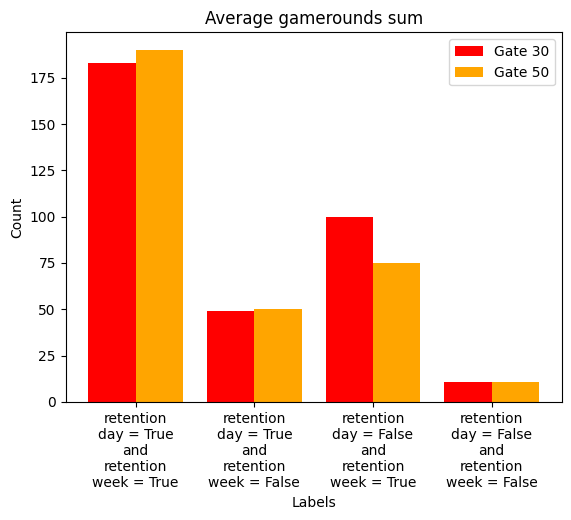

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap

   
labels= ['retention day = True and retention week = True ', 'retention day = True and retention week = False ', 'retention day = False and retention week = True ', 'retention day = False and retention week = False']


labels = [ '\n'.join(wrap(l, 12)) for l in labels ]

X_axis = np.arange(len(labels))
  
plt.bar(X_axis - 0.2, t, 0.4, label = 'Gate 30', color = 'red')
plt.bar(X_axis + 0.2, f, 0.4, label = 'Gate 50', color = 'orange')


    
plt.xticks(X_axis, labels)
plt.title('Average gamerounds sum')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
print(max(tt_30))

2961


In [ ]:
#mode

t_mode= []
f_mode=[]
t_mode.append(statistics.mode(tt_30))
t_mode.append(statistics.mode(tf_30))
t_mode.append(statistics.mode(ft_30))
t_mode.append(statistics.mode(ff_30)) 

f_mode.append(statistics.mode(tt_50))
f_mode.append(statistics.mode(tf_50))
f_mode.append(statistics.mode(ft_50))
f_mode.append(statistics.mode(ff_50))

print(t_mode)
f_mode

[55, 8, 4, 1]


[69, 11, 14, 1]

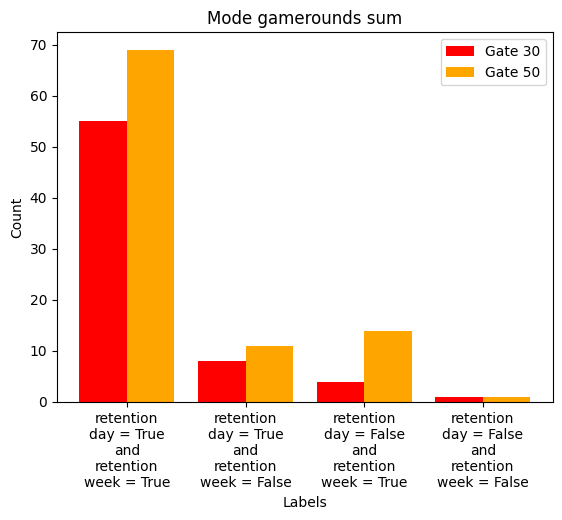

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap
  
labels= ['retention day = True and retention week = True ', 'retention day = True and retention week = False ', 'retention day = False and retention week = True ', 'retention day = False and retention week = False']

labels = [ '\n'.join(wrap(l, 12)) for l in labels ]

X_axis = np.arange(len(labels))
  
plt.bar(X_axis - 0.2, t_mode, 0.4, label = 'Gate 30', color = 'red')
plt.bar(X_axis + 0.2, f_mode, 0.4, label = 'Gate 50', color = 'orange')

plt.xticks(X_axis, labels)
plt.title('Mode gamerounds sum')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.legend()
plt.show()

dont include max - graph doesnt work

In [ ]:
#quantiles

In [ ]:

t_quantiles= []
f_quantiles=[]
t_quantiles.append(statistics.quantiles(tt_30))
t_quantiles.append(statistics.quantiles(tf_30))
t_quantiles.append(statistics.quantiles(ft_30))
t_quantiles.append(statistics.quantiles(ff_30)) 

f_quantiles.append(statistics.quantiles(tt_50))
f_quantiles.append(statistics.quantiles(tf_50))
f_quantiles.append(statistics.quantiles(ft_50))
f_quantiles.append(statistics.quantiles(ff_50))

print(t_quantiles)
print( )
f_quantiles


[[64.0, 127.0, 237.0], [16.0, 33.0, 60.0], [19.0, 43.0, 90.0], [2.0, 6.0, 14.0]]



[[69.0, 133.0, 243.0],
 [16.0, 32.0, 63.0],
 [19.0, 47.0, 98.0],
 [2.0, 6.0, 14.0]]

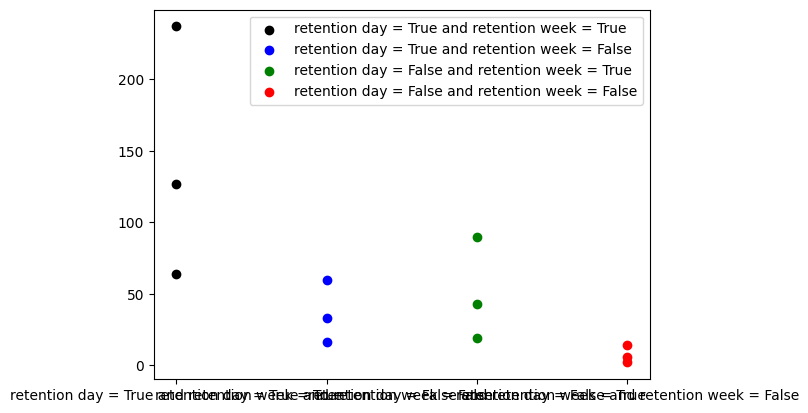

In [ ]:
#30 quantiles
import matplotlib.pyplot as plt

d = {'retention day = True and retention week = True': t_quantiles[0], 'retention day = True and retention week = False ': t_quantiles[1], 'retention day = False and retention week = True': t_quantiles[2] , 'retention day = False and retention week = False': t_quantiles[3]}
colors = list("rgbk")

fig, ax = plt.subplots()

for x, ys in d.items():
    ax.scatter([x] * len(ys), ys, color = colors.pop(), label=x)

plt.legend()
plt.show()

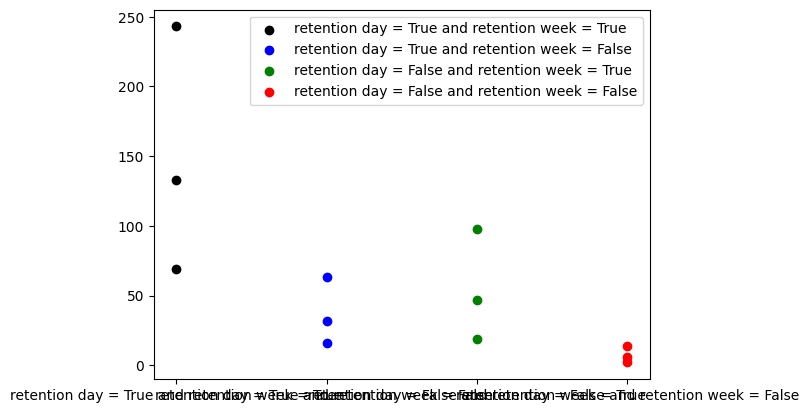

In [ ]:
import matplotlib.pyplot as plt

d = {'retention day = True and retention week = True': f_quantiles[0], 'retention day = True and retention week = False ': f_quantiles[1], 'retention day = False and retention week = True': f_quantiles[2] , 'retention day = False and retention week = False': f_quantiles[3]}
colors = list("rgbk")

fig, ax = plt.subplots()

for x, ys in d.items():
    ax.scatter([x] * len(ys), ys, color = colors.pop(), label=x)

plt.legend()
plt.show()

In [ ]:
# looks no different need table

## **A/B Testing**

A/B testing refers to a randomized experiment
which evaluates which variant performs better.

What is desired outcome of test? what is our hypothesis?

what is the metrci we are trying to impact ie. page views, conversions?

will we get enough traffic to our site to reachs tatitical signicane and make a decision in tijmely manner?

A big benefit of running A/B tests is we can
be confident that the increase in the relevant
metrics was due to the action we took in the
test.

In [ ]:
df

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


In [ ]:
groups = df.groupby(['gate'])['user_id'].nunique()
print(groups)

gate
30    44700
50    45489
Name: user_id, dtype: int64


In [ ]:
played_next_day= df[df['retention_day']==True]['user_id'].nunique()
print(played_next_day)
played_next_day= df[df['retention_day']==True].groupby(['gate'])['user_id'].nunique()
print(played_next_day)

didnt_play_next_day= df[df['retention_day']==False]['user_id'].nunique()
print(didnt_play_next_day)
didnt_play_next_day= df[df['retention_day']==False].groupby(['gate'])['user_id'].nunique()
print(didnt_play_next_day)

40153
gate
30    20034
50    20119
Name: user_id, dtype: int64
50036
gate
30    24666
50    25370
Name: user_id, dtype: int64


In [ ]:
print((played_next_day/groups)*100)
print((didnt_play_next_day/groups)*100)

gate
30    44.818792
50    44.228275
Name: user_id, dtype: float64
gate
30    55.181208
50    55.771725
Name: user_id, dtype: float64


In [ ]:
played_next_week= df[df['retention_week']==True]['user_id'].nunique()
print(played_next_week)
played_next_week= df[df['retention_week']==True].groupby(['gate'])['user_id'].nunique()
print(played_next_week)

didnt_play_next_week= df[df['retention_week']==False]['user_id'].nunique()
print(didnt_play_next_week)
didnt_play_next_week= df[df['retention_week']==False].groupby(['gate'])['user_id'].nunique()
print(didnt_play_next_week)

print((played_next_week/groups)*100)
print((didnt_play_next_week/groups)*100)

16781
gate
30    8502
50    8279
Name: user_id, dtype: int64
73408
gate
30    36198
50    37210
Name: user_id, dtype: int64
gate
30    19.020134
50    18.200004
Name: user_id, dtype: float64
gate
30    80.979866
50    81.799996
Name: user_id, dtype: float64


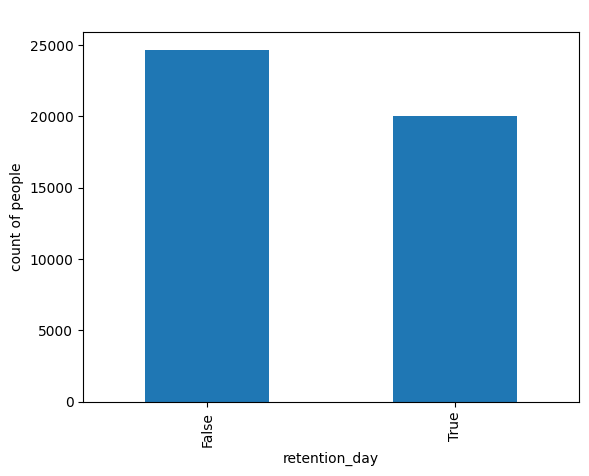

In [ ]:
gate_30 = df[df['gate']== 30]

alloc = gate_30.groupby(['retention_day'])['user_id'].nunique()
# Plot a bar chart of the test allocation
import matplotlib.pyplot as plt

alloc.plot(kind='bar')
plt.title(' ')
plt.ylabel('count of people')
plt.show()

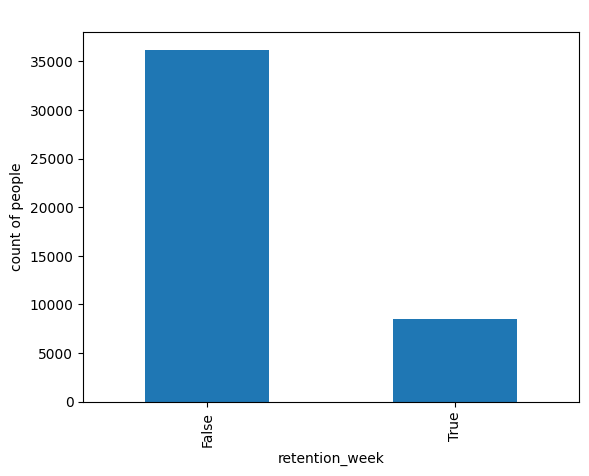

In [ ]:
gate_30 = df[df['gate']== 30]

alloc = gate_30.groupby(['retention_week'])['user_id'].nunique()
# Plot a bar chart of the test allocation
import matplotlib.pyplot as plt

alloc.plot(kind='bar')
plt.title(' ')
plt.ylabel('count of people')
plt.show()

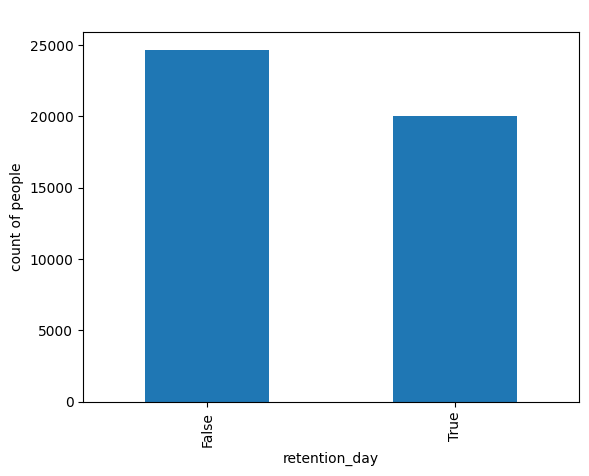

In [ ]:
gate_50 = df[df['gate']== 50]

alloc = gate_30.groupby(['retention_day'])['user_id'].nunique()
# Plot a bar chart of the test allocation
import matplotlib.pyplot as plt

alloc.plot(kind='bar')
plt.title(' ')
plt.ylabel('count of people')
plt.show()

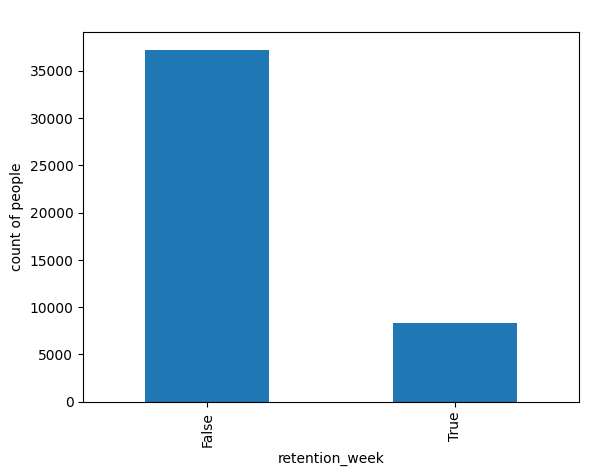

In [ ]:
gate_30 = df[df['gate']== 50]

alloc = gate_30.groupby(['retention_week'])['user_id'].nunique()

import matplotlib.pyplot as plt
alloc.plot(kind='bar')
plt.title(' ')
plt.ylabel('count of people')
plt.show()

Tutorial 7

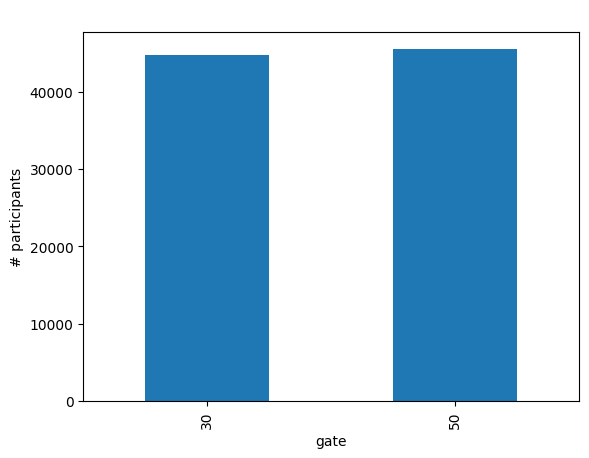

In [ ]:
alloc = df.groupby(['gate'])['user_id'].nunique()
import matplotlib.pyplot as plt
alloc.plot(kind='bar')
plt.title('  ')
plt.ylabel('# participants')
plt.show()

Allocation is relatively even, but not
exactly the same. typically the case

Do this for retention day and retention week

retention day

In [ ]:
# Group marketing by user_id and variant
a = df.groupby(['user_id', 'gate'])['retention_day'].max()
a_df = pd.DataFrame(a.unstack(level=1)) 
print(a_df)

gate        30     50
user_id              
116      False    NaN
337       True    NaN
377        NaN   True
483        NaN  False
488        NaN   True
...        ...    ...
9999441    NaN   True
9999479    NaN  False
9999710   True    NaN
9999768    NaN   True
9999861    NaN  False

[90189 rows x 2 columns]


In [ ]:
thirty_day= a_df[30].dropna()
fifty_day=a_df[50].dropna()

In [ ]:
# Calculate % of converted users in each group
import numpy as np

print('Gate 30 retention day rate :', np.mean(thirty_day))
print('Gate 50 retention day rate:', np.mean(fifty_day))

Gate 30 retention day rate : 0.4481879194630872
Gate 50 retention day rate: 0.44228274967574577


retention week

In [ ]:
# Group marketing by user_id and variant
b = df.groupby(['user_id', 'gate'])['retention_week'].max()
b_df = pd.DataFrame(b.unstack(level=1)) 
print(b_df)

gate        30     50
user_id              
116      False    NaN
337      False    NaN
377        NaN  False
483        NaN  False
488        NaN   True
...        ...    ...
9999441    NaN  False
9999479    NaN  False
9999710  False    NaN
9999768    NaN  False
9999861    NaN  False

[90189 rows x 2 columns]


In [ ]:
thirty_week= b_df[30].dropna()
fifty_week=b_df[50].dropna()

In [ ]:
# Calculate % of converted users in each group
import numpy as np

print('Gate 30 retention week rate :', np.mean(thirty_week))
print('Gate 50 retention week rate:', np.mean(fifty_week))

Gate 30 retention week rate : 0.19020134228187918
Gate 50 retention week rate: 0.18200004396667327


In [ ]:
mtd = np.mean(thirty_day)
mfd = np.mean(fifty_day)
mtw = np.mean(thirty_week)
mfw = np.mean(fifty_week)

Calculating Lift and Significance Test

Retention Day

In [ ]:
day_lift = ((mfd - mtd)/mtd)

print(day_lift)
print("Lift: ", str(round(day_lift*100, 2)) + '%')

-0.01317565585974659
Lift:  -1.32%


It disimproved by 1.32%. This is a bad sign so we should not consider moving it to gate 50 as it would disimproved the next day  retention rate by 1.32%

In [ ]:
from scipy.stats import ttest_ind

thirty_day = thirty_day.astype(float)
fifty_day = fifty_day.astype(float)

t = ttest_ind(thirty_day, fifty_day)

print(t)

Ttest_indResult(statistic=1.7840979256519656, pvalue=0.07441111525563184)


Since p-value here is **not** less than 0.05 and
the t-statistic is not less than -1.96, we
can **not** be confident that the difference in
conversion rates is statistically significant.

Retention Week

In [ ]:
week_lift = ((mfw - mtw)/mfw)

print(week_lift)
print("Lift: ", str(round(week_lift*100, 2)) + '%')

-0.04506206776910276
Lift:  -4.51%


It disimproved by 4.51%. This is a bad sign so we should not consider moving it to gate 50 as it would disimproved the next week retention rate by 4.51%

In [ ]:
from scipy.stats import ttest_ind

thirty_week = thirty_week.astype(float)
fifty_week = fifty_week.astype(float)

t = ttest_ind(thirty_week, fifty_week)

print(t)

Ttest_indResult(statistic=3.1644994996802778, pvalue=0.0015540151201088365)


Since p-value here is less than 0.05, we
**can** be confident that the difference in
conversion rates is statistically significant.